In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img

In [98]:
image=img.imread("Screenshot from 2020-09-08 22-26-34.png")

In [99]:
image.shape

(254, 257, 4)

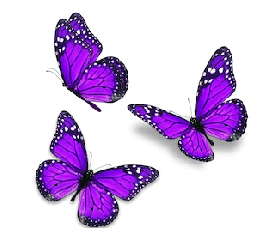

In [100]:
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [101]:
#The shape has 4 in the third dimension which means that every pixel is represented by rgba value.a can be removed.
#Hence renmoving the last aspect

r,g,b=[],[],[]
for row in image:
    for temp_r, temp_g, temp_b,temp_a in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [102]:
from scipy.cluster.vq import whiten #Whiten is used to Scale the data

scaled_red = whiten(r)
scaled_green = whiten(g)
scaled_blue = whiten(b)

In [103]:
#Converting data to dataFrame
df=pd.DataFrame({"red":r,"green":g,"blue":b,'scaled_red':scaled_red,'scaled_green':scaled_green,'scaled_blue':scaled_blue})
df.head(5)

,blue,green,red,scaled_blue,scaled_green,scaled_red
0,1.0,1.0,1.0,4.354201,2.443426,3.46163
1,1.0,1.0,1.0,4.354201,2.443426,3.46163
2,1.0,1.0,1.0,4.354201,2.443426,3.46163
3,1.0,1.0,1.0,4.354201,2.443426,3.46163
4,1.0,1.0,1.0,4.354201,2.443426,3.46163


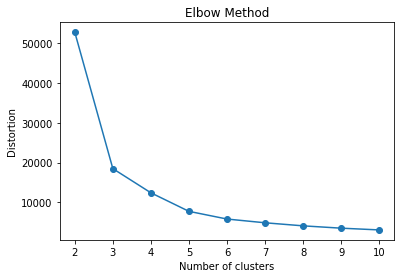

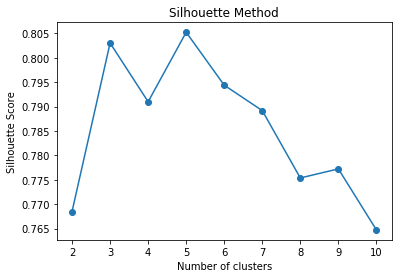

In [104]:
#Finding clusters by the elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distortions=list()
sil=list()

for cluster in range(2,11):
    model=KMeans(n_clusters=cluster,init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    model.fit(df[['scaled_red','scaled_green','scaled_blue']])
    distortions.append(model.inertia_)
    sil.append(silhouette_score(df[['scaled_red','scaled_green','scaled_blue']], model.labels_, metric = 'euclidean'))

plt.plot(range(2,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow Method")
plt.show()

plt.plot(range(2,11),sil,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Method")
plt.show()

In [116]:
#We will select clusters=5 as per the silhouette method and elbow method
model=KMeans(n_clusters=5,init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
model.fit(df[['scaled_red','scaled_green','scaled_blue']])
cc=model.cluster_centers_
print(cc)

[[3.44610053 2.42975585 4.33613757]
 [1.28085265 0.31326373 2.61421514]
 [2.45291497 1.64662695 3.23528785]
 [0.47336693 0.19360931 1.07747343]
 [2.24407758 0.26404389 4.03316494]]


In [106]:
colors=list()
r_std,g_std,b_std=df[['red','green','blue']].std()
for cluster_center in cc:
    r,g,b=cluster_center
    colors.append((r*r_std,g*g_std,b*b_std))

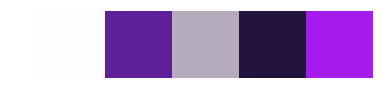

In [118]:
#Dominanant Colors
plt.imshow([colors])
plt.axis('off')
plt.show()

In [108]:
#Further study
pixels_colourwise = np.unique(model.labels_, return_counts=True)[1]
pixels_colourwise

array([41874,  5850,  3455,  5341,  8758])

In [109]:
#Comparative study

for i in range(len(colors)):
    colors[i]=colors[i]+(1,)
colors

[(0.9955212537940692, 0.9944130728643524, 0.995859089824113, 1),
 (0.3700170733212624, 0.12820775774214405, 0.6003937535695821, 1),
 (0.7086064287338361, 0.6739061324960604, 0.7430324252023378, 1),
 (0.13674784978182716, 0.07923743707441352, 0.24745794928563827, 1),
 (0.6482767707764395, 0.10806381690269641, 0.9262768781338574, 1)]

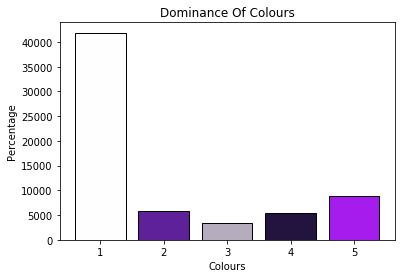

In [113]:
plt.title('Dominance Of Colours')
plt.bar(range(1,6), pixels_colourwise,color=np.array(colors),edgecolor='black')
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.xticks(range(1,6))
plt.show()

In [111]:
dim1=image.shape[0]
dim2=image.shape[1]
regImage=image.copy()

for i in range(dim1):
    for j in range(dim2):
        tmp=(i*dim2)+j
        regImage[i][j]=colors[model.labels_[tmp]]

Regenerated Image


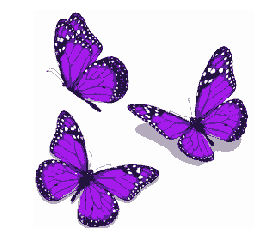

Original Image


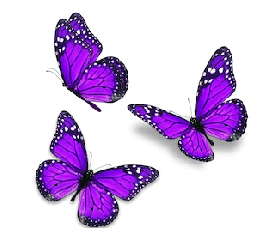

In [114]:
print("Regenerated Image")
plt.figure()
plt.imshow(regImage)
plt.axis("off")
plt.show()

print("Original Image")
plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()

In [115]:
#That's a pretty good regenerated image!!!